**PART 3: Reliabiltiy**

This notebook will evaluate the reliability of the coding process. For this reason, we are going to use a traditional approach in content analysis for communication sciences, which is content analysis according to Klaus Krippendorff. The author also designed an alpha to measure the effort made by coders and how well they are coding the same thing. It directly compares the polarization scores assigned by GPT-4 and the local Gemma3 model used (12 billion parameters running with Ollama). By calculating Krippendorff's alpha, we can statistically measure the level of agreement between our two "AI coders," which helps us understand the reliability of our labeled data.

**Structure:**

Setup: Imports  libraries.

Data: Loads the two datasets annotated by GPT-4 and Gemma. Then, aligns the data, focusing on the first 100 tweets where both models provided classifications. The polar_score columns are converted to a numeric type, with any non-numeric values (like "INV" or "ERR") treated as missing data (NaN). A new comparison_df is created containing only the valid, paired scores from both models.

Statistical analysis with Krippendorff' alpha: the paired scores are structured into a scores_matrix, which is the required input format for the krippendorff library. We uses Krippendorff since is common in communication studies to evaluate content analysys reliability in codification process, similar to the ones we require form the AI coders. Krippendorff's Alpha is calculated using the ordinal level of measurement, as the polarization scores represent ranked categories. The resulting alpha coefficient quantifies the level of agreement between the two models.

Disagreement analysis: A scatter plot is generated to visually compare the scores from GPT-4 and Gemma. A diagonal line represents perfect agreement. The absolute difference between the scores for each tweet is calculated, and the tweets with the largest disagreements are displayed to allow for qualitative analysis of where and why the models differed.

In [1]:
#first we upload the Krippendorff alpha module
!pip install krippendorff

In [6]:
#second, create the single database to compare the tweets code. we are only using one column in this case
import pandas as pd
import numpy as np
import krippendorff

# Load both datasets
gpt_df = pd.read_csv("data/sample/debate_tweets_sample_1000_for_annotation_labeled.csv")
ollama_df = pd.read_csv("data/sample/debate_tweets_sample_1000_fewshot_ollama.csv")

# Select first 100 tweets from the GPT-coded dataset
gpt_sample = gpt_df.head(100).copy()
ollama_sample = ollama_df.copy()

# Ensure 'polar_score' is numeric and handle 'INV'
gpt_sample['polar_score'] = pd.to_numeric(gpt_sample['polar_score'], errors='coerce')
ollama_sample['polar_score'] = pd.to_numeric(ollama_sample['polar_score'], errors='coerce')

# Drop any tweets where either source has missing or invalid scores
comparison_df = pd.DataFrame({
    'gpt_score': gpt_sample['polar_score'],
    'ollama_score': ollama_sample['polar_score']
}).dropna()

# Display size of comparison dataset
print(f"Aligned and valid tweets for comparison: {len(comparison_df)}")
comparison_df.head()

Aligned and valid tweets for comparison: 99


,gpt_score,ollama_score
0,-5.0,7
1,-2.0,-5
2,3.0,5
3,5.0,3
4,-3.0,5


In [7]:
#now compute the alpha
# Create coder-item matrix: 2 coders × N tweets
scores_matrix = np.array([
    comparison_df['gpt_score'].tolist(),
    comparison_df['ollama_score'].tolist()
])

# Compute Krippendorff's alpha using ordinal scale
alpha = krippendorff.alpha(reliability_data=scores_matrix, level_of_measurement='ordinal')

print(f"Krippendorff’s alpha (ordinal): {alpha:.3f}")

Krippendorff’s alpha (ordinal): -0.466


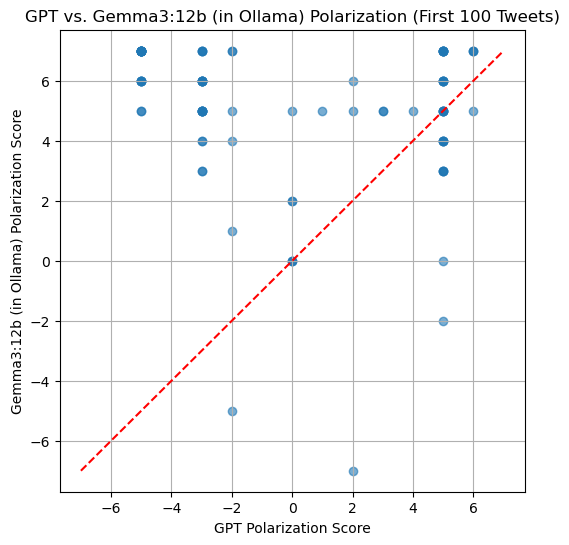

In [8]:
#scatter plot to sse the comparisojn
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(comparison_df['gpt_score'], comparison_df['ollama_score'], alpha=0.6)
plt.plot([-7, 7], [-7, 7], color='red', linestyle='--')
plt.xlabel("GPT Polarization Score")
plt.ylabel("Gemma3:12b (in Ollama) Polarization Score")
plt.title("GPT vs. Gemma3:12b (in Ollama) Polarization (First 100 Tweets)")
plt.grid(True)
plt.show()

In [9]:
pd.set_option('display.max_colwidth', None)  # Show full column content
pd.set_option('display.width', 1000)         # Increase total display width

# Load both annotated files
df_gpt = pd.read_csv("data/sample/debate_tweets_sample_1000_for_annotation_labeled.csv")
df_ollama = pd.read_csv("data/sample/debate_tweets_sample_1000_fewshot_ollama.csv")

# Restrict to first 100 rows for valid comparison
df_gpt = df_gpt.iloc[:100].copy()
df_ollama = df_ollama.iloc[:100].copy()

# Ensure polar_score is numeric
df_gpt['polar_score'] = pd.to_numeric(df_gpt['polar_score'], errors='coerce')
df_ollama['polar_score'] = pd.to_numeric(df_ollama['polar_score'], errors='coerce')

# Combine both df
df_compare = pd.DataFrame({
    'tweet': df_gpt['santext'],
    'gpt_score': df_gpt['polar_score'],
    'ollama_score': df_ollama['polar_score']
})

# Calculate disagreement magnitude
df_compare['abs_diff'] = (df_compare['gpt_score'] - df_compare['ollama_score']).abs()

# Sort by disagreement size
df_disagreements = df_compare.sort_values(by='abs_diff', ascending=False)

# evaluate the top 15 disagreements by seen how well behave on a certain numner (15 here)
df_disagreements.head(15) #this will allow us to evaluate with human judgement the disagreements

,tweet,gpt_score,ollama_score,abs_diff
0,rt ryanshead donald trump is dumb as fuuuuuuuuck,-5.0,7,12.0
7,rt tristansnell trump claimed his fine people quote about nazis in charlottesville was debunked unfortunately for trump he said the line on tv and we all watched it,-5.0,7,12.0
20,rt vabvox i have cancer and i am wasting precious minutes of my life watching two journalists who are paid 7 figures sit there like bumps on a log while trump totally misrepresents his presidency and bidens and our lived reality and tbh im fcking furious debatenight debates2024,-5.0,7,12.0
11,rt davidcorndc ponder this for a moment the gop presidential and vicepresidential nominees have amplified this antiimmigrant disinformation that started with neonazis so where are the headlines trump and vance boost false nazi propaganda rt zaidjilani i want to apologize ive been saying that the gop cooked up these fake haitian stories a week ago as an election ploy but this young man was discussing issue as early as august 27 he attended a town hall meeting to speak out hes a leader in the neonazi group blood pride,-5.0,7,12.0
10,rt occupydemocrats retweet if you think that kamala harris is absolutely destroying donald trump on that stage thats our future madam president up there debate2024,-5.0,7,12.0
18,rt harriswins breaking in a stunning moment donald trump just admitted he got involved with the taliban retweet so all americans see this,-5.0,7,12.0
8,rt occupydemocrats retweet if you think that kamala harris is absolutely destroying donald trump on that stage thats our future madam president up there debate2024,-5.0,7,12.0
88,rt kamalaharris donald trump has been prosecuted for national security crimes economic crimes election interferenceand has been found liable for sexual assault lets be clear i will always stand for the rule of law,-5.0,7,12.0
92,rt keitholbermann cnns decision to abrogate its journalistic responsibilities by not fact checking trumps firehose of lies is unforgivable this debate is biden vs the tag team of trump and cnns utter failure as a news organization,-5.0,7,12.0
42,rt angrystaffer donald trump was fired by 81 million people and clearly hes having a very difficult time processing that she just killed him,-5.0,7,12.0
